In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, OptionMenu, StringVar, Frame
from tkinter.filedialog import askopenfilename
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.DataFrame()


In [2]:


# Function to calculate line of best fit
def line_of_best_fit(x, y):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    return polynomial

# Function to plot the data for Graph 1
def plot_data_graph1():
    if canvas1:
        canvas1.get_tk_widget().destroy()
    plot_data(canvas1, x_var1, y_var1, color_var1, frame1)

# Function to plot the data for Graph 2
def plot_data_graph2():
    if canvas2:
        canvas2.get_tk_widget().destroy()
    plot_data(canvas2, x_var2, y_var2, color_var2, frame2)

# Generic function to plot data
def plot_data(canvas, x_var, y_var, color_var, frame):

    x_col = x_var.get()
    y_col = y_var.get()
    color_col = color_var.get()
    
    if x_col and y_col and color_col:
        x = df[x_col]
        y = df[y_col]
        color_values = df[color_col]
        
        # Map colors: Red for True, Blue for False
        colors = color_values.map({True: 'red', False: 'blue', 1: 'red', 0: 'blue'})
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.scatter(x, y, c=colors, label='Data Points')
        
        # Add line of best fit
        fit = line_of_best_fit(x, y)
        ax.plot(x, fit(x), color='green', label='Line of Best Fit')
        
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"Scatterplot: {x_col} vs {y_col}")
        ax.legend()
        
        # Render plot in the Tkinter window
        if canvas:
            canvas.get_tk_widget().destroy()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.get_tk_widget().pack()
        canvas.draw()

# Function to load data
def load_data():
    #filepath = askopenfilename(filetypes=[("CSV Files", "*.csv"), ("Excel Files", "*.xlsx")])
    filepath = "./nfl_team_stats_2002-2023.csv"
    if filepath:
        if filepath.endswith('.csv'):
            df = pd.read_csv(filepath)
    else:
        df = pd.read_excel(filepath)
    df['winner'] = df.apply(
    lambda row: row['home'] if row['score_home'] > row['score_away'] else row['away'],
    axis=1
    )

    # Add 'home_win' column based on the 'winner' column
    df['win_home'] = df['winner'] == df['home']
    # Update dropdown options
    update_dropdowns(df, x_var1, y_var1, color_var1, x_menu1, y_menu1, color_menu1)
    update_dropdowns(df, x_var2, y_var2, color_var2, x_menu2, y_menu2, color_menu2)

# Function to update dropdowns
def update_dropdowns(df, x_var, y_var, color_var, x_menu, y_menu, color_menu):
    columns = list(df.columns)
    x_var.set(columns[0])
    y_var.set(columns[1])
    color_var.set(columns[0])
    x_menu['menu'].delete(0, 'end')
    y_menu['menu'].delete(0, 'end')
    color_menu['menu'].delete(0, 'end')
    for col in columns:
        x_menu['menu'].add_command(label=col, command=lambda c=col: x_var.set(c))
        y_menu['menu'].add_command(label=col, command=lambda c=col: y_var.set(c))
        color_menu['menu'].add_command(label=col, command=lambda c=col: color_var.set(c))

# Initialize the main window
window = Tk()
window.title("Dual Scatterplot UI with Conditional Coloring")
window.geometry("1200x800")

# Initialize variables
df = pd.DataFrame()
canvas1 = None
canvas2 = None

# Graph 1
x_var1 = StringVar()
y_var1 = StringVar()
color_var1 = StringVar()
frame1 = Frame(window)
frame1.pack(side="left", padx=10, pady=10)

Label(frame1, text="Graph 1: X-Axis").pack()
x_menu1 = OptionMenu(frame1, x_var1, ())
x_menu1.pack()

Label(frame1, text="Graph 1: Y-Axis").pack()
y_menu1 = OptionMenu(frame1, y_var1, ())
y_menu1.pack()

Label(frame1, text="Graph 1: Color By").pack()
color_menu1 = OptionMenu(frame1, color_var1, ())
color_menu1.pack()

Button(frame1, text="Plot Graph 1", command=plot_data_graph1).pack()

# Graph 2
x_var2 = StringVar()
y_var2 = StringVar()
color_var2 = StringVar()
frame2 = Frame(window)
frame2.pack(side="right", padx=10, pady=10)

Label(frame2, text="Graph 2: X-Axis").pack()
x_menu2 = OptionMenu(frame2, x_var2, ())
x_menu2.pack()

Label(frame2, text="Graph 2: Y-Axis").pack()
y_menu2 = OptionMenu(frame2, y_var2, ())
y_menu2.pack()

Label(frame2, text="Graph 2: Color By").pack()
color_menu2 = OptionMenu(frame2, color_var2, ())
color_menu2.pack()

Button(frame2, text="Plot Graph 2", command=plot_data_graph2).pack()

# Load Data Button
Button(window, text="Load Data", command=load_data).pack()

# Start the Tkinter main loop
window.mainloop()


2025-01-07 14:47:22.676 Python[2424:6649880] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/nv/tym405xj6635s86f7b21f3c80000gn/T/org.python.python.savedState
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/tkinter/__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/nv/tym405xj6635s86f7b21f3c80000gn/T/ipykernel_2424/212727336.py", line 11, in plot_data_graph1
    plot_data(canvas1, x_var1, y_var1, color_var1, frame1)
  File "/var/folders/nv/tym405xj6635s86f7b21f3c80000gn/T/ipykernel_2424/212727336.py", line 27, in plot_data
    x = df[x_col]
        ~~^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/frame.py", line 4090, in __getitem__
    indexer = self.columns.get_loc(key)
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File

      season        week        date  time_et  neutral        away  \
0       2002           1  2002-09-05  8:30 PM    False       49ers   
1       2002           1  2002-09-08  1:00 PM    False       Colts   
2       2002           1  2002-09-08  1:00 PM    False   Cardinals   
3       2002           1  2002-09-08  1:00 PM    False       Lions   
4       2002           1  2002-09-08  1:00 PM    False      Eagles   
...      ...         ...         ...      ...      ...         ...   
5924    2023    Division  2024-01-21  3:00 PM    False  Buccaneers   
5925    2023    Division  2024-01-21  6:30 PM    False      Chiefs   
5926    2023  Conference  2024-01-28  3:00 PM    False      Chiefs   
5927    2023  Conference  2024-01-28  6:30 PM    False       Lions   
5928    2023   Superbowl  2024-02-11  6:30 PM     True       49ers   

            home  score_away  score_home  first_downs_away  ...  \
0         Giants          16          13                13  ...   
1        Jaguars         

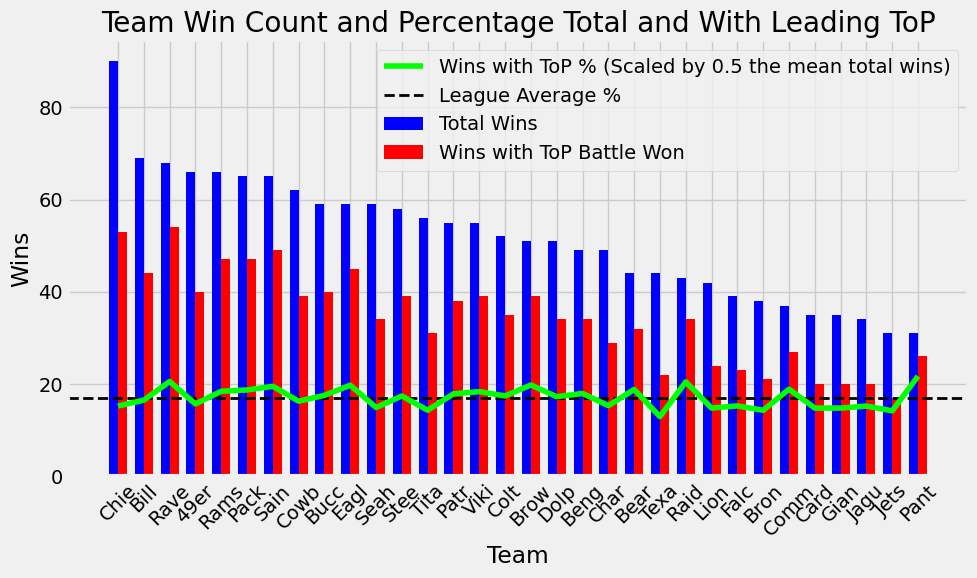

          team abbrev  total_wins  win_with_ToP  percent_W_ToP
18      Chiefs   Chie          90            53       0.588889
9        Bills   Bill          69            44       0.637681
17      Ravens   Rave          68            54       0.794118
27       49ers   49er          66            40       0.606061
23        Rams   Rams          66            47       0.712121
10     Packers   Pack          65            47       0.723077
16      Saints   Sain          65            49       0.753846
20     Cowboys   Cowb          62            39       0.629032
13  Buccaneers   Bucc          59            40       0.677966
29      Eagles   Eagl          59            45       0.762712
24    Seahawks   Seah          59            34       0.576271
28    Steelers   Stee          58            39       0.672414
4       Titans   Tita          56            31       0.553571
15    Patriots   Patr          55            38       0.690909
25     Vikings   Viki          55            39       0

In [ ]:
import basics
df = basics.get_df()



ats, teams, abv = basics.get_team_stats(2018, 2023, df)
print(ats.head())
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35

# Create an array of positions for the bars
x_positions = np.arange(len(teams))

# Plot the 'total_wins' as the first layer of bars
ax.bar(x_positions - bar_width / 2, ats['total_wins'], bar_width, label='Total Wins', color='blue')

# Plot the 'win_with_ToP' as the second layer of bars, slightly offset
ax.bar(x_positions + bar_width / 2, ats['win_with_ToP'], bar_width, label='Wins with ToP Battle Won', color='red')
ax.set_xticks(x_positions)
ax.set_xticklabels(ats["abbrev"], rotation=45)
scatter_x = ats['abbrev']  # x-values (team abbreviations)
scatter_y = ats['percent_W_ToP'] * (ats['total_wins'].mean()/2)  # y-values (wins with ToP)
ax.plot(scatter_x, scatter_y, color='lime', label='Wins with ToP % (Scaled by 0.5 the mean total wins)', zorder=5)
ax.axhline(y=scatter_y.mean(), color='black', linestyle='--', linewidth=2, label=f'League Average % ()')

ax.set_xlabel('Team')
ax.set_ylabel('Wins')
ax.set_title('Team Win Count and Percentage Total and With Leading ToP')
ax.legend()
plt.xticks(rotation=45)  # Rotate team abbreviations for better readability
plt.tight_layout()
plt.show()
print(ats)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()
df = basics.get_df()
df['winner'] = label_encoder.fit_transform(df['winner'])
df['possession_away'] = df['possession_away'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df['possession_home'] = df['possession_home'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
# df['home'] =
# Separate features (X) and target (y)
X = df.drop(columns=['winner', 'home', 'away','win_home',  "season",
    "week",
    "date",
    "time_et",
    "neutral",
    "score_away",
    "score_home",])
y = df['winner']

# Handle scaling if needed (for numeric features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 5: Make Predictions
new_game_stats = df.iloc[0]  # Use the first row for prediction

# Drop the same columns from new_game_stats as from X
new_game_stats = new_game_stats.drop(['winner', 'home', 'away', 'win_home', 
                                      "season", "week", "date", "time_et", 
                                      "neutral", "score_away", "score_home"])

new_game_stats = new_game_stats.values.reshape(1, -1)
new_game_scaled = scaler.transform(new_game_stats)
prediction = model.predict(new_game_scaled)
predicted_outcome = label_encoder.inverse_transform(prediction)
print("Predicted Outcome:", predicted_outcome)

      season        week        date  time_et  neutral        away  \
0       2002           1  2002-09-05  8:30 PM    False       49ers   
1       2002           1  2002-09-08  1:00 PM    False       Colts   
2       2002           1  2002-09-08  1:00 PM    False   Cardinals   
3       2002           1  2002-09-08  1:00 PM    False       Lions   
4       2002           1  2002-09-08  1:00 PM    False      Eagles   
...      ...         ...         ...      ...      ...         ...   
5924    2023    Division  2024-01-21  3:00 PM    False  Buccaneers   
5925    2023    Division  2024-01-21  6:30 PM    False      Chiefs   
5926    2023  Conference  2024-01-28  3:00 PM    False      Chiefs   
5927    2023  Conference  2024-01-28  6:30 PM    False       Lions   
5928    2023   Superbowl  2024-02-11  6:30 PM     True       49ers   

            home  score_away  score_home  first_downs_away  ...  \
0         Giants          16          13                13  ...   
1        Jaguars         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
